# Gradient boosting for Work Engagement Latent variable regression

In [1]:
# Importing libraries for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing libraries for machine learning
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from joblib import dump,load
import shap


# Importing libraries for hyperparameter optimization
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
# Display setting for exploration
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
# Check out if the environment is the correct Anaconda one
import sys
print('environment: ',sys.executable)

# Set up directory to be the github repository
# requires git
import os
import subprocess
os.getcwd()
output = subprocess.check_output(['git', 'rev-parse', '--show-toplevel'])
path = output.decode('utf-8').strip()
print('working directory: ',path)
os.chdir(path)


environment:  c:\Users\ricca\anaconda3\envs\Thesis\python.exe
working directory:  C:/Users/ricca/Documents/GitHub/Thesis-SEM-ML


In [3]:
from Source.DataPreparation.DataProcessor import DataProcessor
from Source.Regression.GBoost_latent_variable_regression import GBoostRegression

In [4]:
processorclass=DataProcessor()
#processorclass.read_df()
#processorclass.split_data()
#processorclass.save_data()
#processorclass.process_CFA()

In [5]:
X_train,y_train,X_test,y_test = processorclass.train_test_data_for_WEtarget(target_variable='WorkEngagement',Categories=False)
display(X_test)

,telework,wp_size,private_sector,seniority,part_time,empl_contract,repetitive_movements,asb_verbal,asb_unwanted_sexatt,asb_violence_harassment,discrimination,emot_disturb,night,usual_hours_week,shortnotice,able_hour_off,undesirable_change,losejob,training_employer,training_onthejob,learning_new_things,work_welldone,usefull_work,predict_earnings,ProfessionalSupport,JobOverload,Environmentalrisks,WorkAgency,WHO5
0,4,4,1,20,2,6,<NA>,<NA>,<NA>,<NA>,2,2,1,50,5,3,4,1,2,1,4,5,5,3,0.517632,-0.298908,-0.425816,0.679304,0.672628
1,2,3,1,20,2,6,5,2,2,2,2,1,1,40,5,4,<NA>,2,<NA>,<NA>,3,4,<NA>,3,0.777150,-0.352409,-0.672400,0.589018,1.477749
2,5,2,1,<NA>,2,6,<NA>,<NA>,<NA>,<NA>,2,1,3,48,5,3,1,4,1,1,5,5,5,1,0.411124,-0.004449,-0.036637,0.209509,0.491681
3,6,8,1,6,2,6,4,2,2,2,2,1,2,50,<NA>,3,2,2,2,2,4,4,4,2,-0.232906,0.357709,-0.027592,-0.094674,-0.568340
4,2,4,5,<NA>,2,6,1,2,2,2,2,3,3,40,4,3,<NA>,4,<NA>,<NA>,4,4,<NA>,2,0.627143,-0.016631,-0.016134,0.091762,-0.033615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,4,5,1,13,2,6,<NA>,<NA>,<NA>,<NA>,2,2,1,45,5,4,5,4,2,1,4,4,4,3,-0.319486,0.100833,-0.272371,0.621092,0.623621
354,1,4,1,<NA>,2,3,<NA>,<NA>,<NA>,<NA>,2,1,1,50,5,3,2,3,1,2,4,4,5,2,0.304372,-0.110620,0.479256,-0.183043,0.404911
355,2,2,2,<NA>,1,3,<NA>,<NA>,<NA>,<NA>,2,1,1,5,5,1,2,2,1,1,5,5,5,1,-0.378328,-0.506090,-0.211436,-0.324064,0.693901
356,1,2,1,11,2,6,3,2,2,2,2,2,1,40,5,4,<NA>,5,<NA>,<NA>,2,4,<NA>,1,0.315178,-0.318188,0.115189,0.307966,0.428701


In [6]:
Xgboost=GBoostRegression(x_train=X_train,y_train=y_train,x_test=X_test,y_test=y_test)
Xgboost.train()
risultati=Xgboost.get_results()

Starting the XGBRegressor training
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalli

In [7]:
print(risultati)

{'best_params': OrderedDict([('colsample_bylevel', 0.7452012672623022), ('colsample_bytree', 1.0), ('gamma', 0.28745392477148307), ('learning_rate', 0.030334308800722954), ('max_depth', 5), ('min_child_weight', 4), ('n_estimators', 400), ('reg_alpha', 0.0), ('reg_lambda', 0.8849018184905485), ('subsample', 0.5)]), 'mse': 0.11668289938757419, 'rmse': 0.34158878697576445, 'mae': 0.269373364291075, 'r2': 0.7643323212822764}


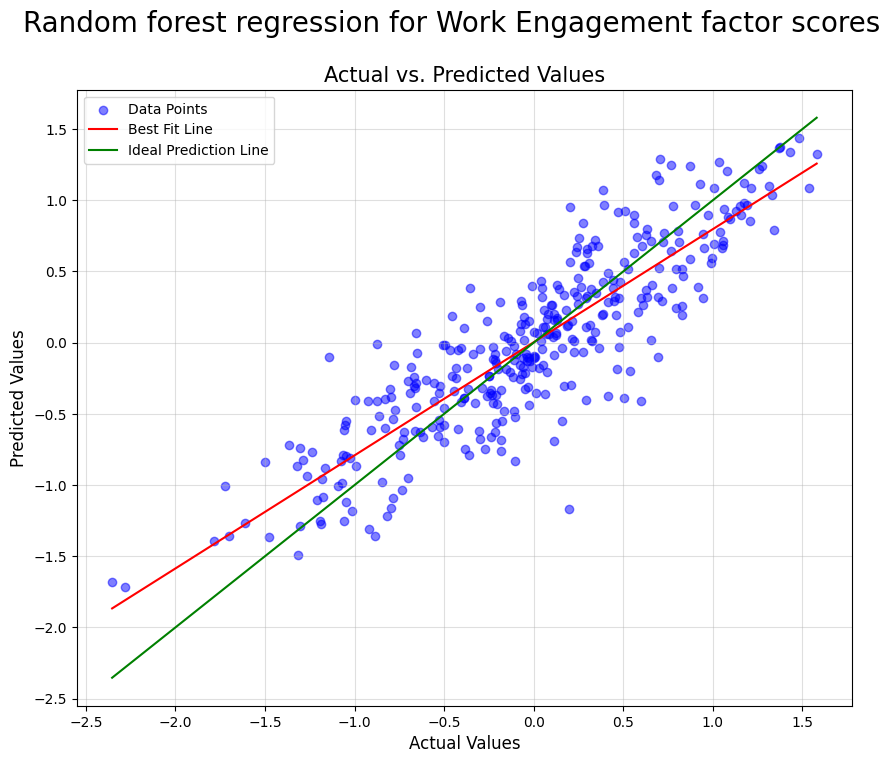

In [8]:
plt.figure(figsize=(10, 8))  # make the plot larger
plt.scatter(Xgboost.y_test, Xgboost.y_pred, alpha=0.5, color='blue')  # alpha makes the dots translucent to visualize density
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(Xgboost.y_test, Xgboost.y_pred, 1))(np.unique(y_test)), color='red')  # adding a best fit line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green')  # adding a y=x line

plt.grid(True, alpha=0.4)  # adding grid and making it more transparent
plt.xlabel('Actual Values', fontsize=12)  # increase font size
plt.ylabel('Predicted Values', fontsize=12)  # increase font size
plt.suptitle('Random forest regression for Work Engagement factor scores', fontsize=20)
plt.title('Actual vs. Predicted Values', fontsize=15)  # increase font size
plt.legend(['Data Points', 'Best Fit Line','Ideal Prediction Line'])  # updating legend
plt.show()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


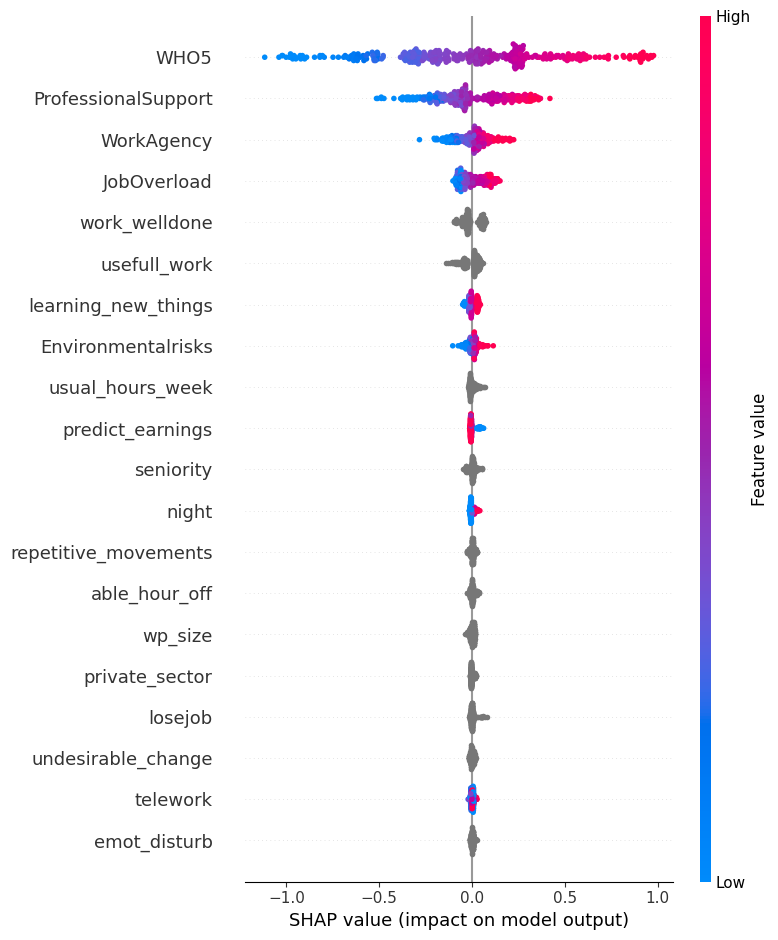

In [9]:
shapscores=Xgboost.get_shap_values()

# Plot the feature importance
shap.summary_plot(shapscores, Xgboost.x_test)

In [10]:
display(pd.DataFrame(Xgboost.x_test).describe())

,telework,wp_size,private_sector,seniority,part_time,empl_contract,repetitive_movements,asb_verbal,asb_unwanted_sexatt,asb_violence_harassment,discrimination,emot_disturb,night,usual_hours_week,shortnotice,able_hour_off,undesirable_change,losejob,training_employer,training_onthejob,learning_new_things,work_welldone,usefull_work,predict_earnings,ProfessionalSupport,JobOverload,Environmentalrisks,WorkAgency,WHO5
count,358.0,338.0,357.0,311.0,357.0,358.0,188.0,188.0,188.0,188.0,356.0,357.0,358.0,351.0,292.0,357.0,234.0,351.0,234.0,233.0,358.0,357.0,235.0,358.0,358.000000,358.000000,358.000000,358.000000,358.000000
mean,3.022346,4.683432,1.330532,12.482315,1.87395,5.715084,3.537234,1.957447,1.984043,1.968085,1.935393,2.182073,1.695531,39.606838,4.688356,3.056022,2.098291,1.917379,1.662393,1.437768,3.857542,4.128852,4.331915,2.488827,-0.005837,0.001703,0.036290,-0.008817,-0.004956
std,1.820996,1.90667,0.615797,10.177403,0.332372,0.783118,1.463896,0.202386,0.125645,0.176243,0.246177,1.140625,1.079232,10.74985,0.622158,0.832756,1.020686,1.096232,0.473907,0.49718,1.055511,0.831394,0.915467,0.712936,0.426656,0.474256,0.440225,0.529514,0.768014
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.193016,-1.471728,-0.783609,-1.718012,-2.374848
25%,1.0,4.0,1.0,4.0,2.0,6.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,36.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,4.0,4.0,2.0,-0.264302,-0.300193,-0.304040,-0.359243,-0.494337
50%,3.0,4.0,1.0,10.0,2.0,6.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,40.0,5.0,3.0,2.0,2.0,2.0,1.0,4.0,4.0,5.0,3.0,-0.015020,0.010523,-0.007181,-0.015794,-0.018411
75%,4.0,6.0,2.0,20.0,2.0,6.0,5.0,2.0,2.0,2.0,2.0,3.0,2.0,45.0,5.0,4.0,3.0,2.0,2.0,2.0,5.0,5.0,5.0,3.0,0.261499,0.333593,0.344373,0.329024,0.473288
max,6.0,8.0,5.0,41.0,2.0,6.0,5.0,2.0,2.0,2.0,2.0,5.0,5.0,70.0,5.0,4.0,5.0,5.0,2.0,2.0,5.0,5.0,5.0,3.0,1.207471,1.359759,1.589907,1.440258,1.905021
